# DATA ANOMALIES: Steps detection in univariate timeseries

In this notebook I am going to a possible techniques to be used to detect strange steps in univariate timeseries. This technique is based on the convolution operator. It will be tested different examples. 

**Note:** if in the dataset there are for example two steps UP, the propossed method only detect the biggest one. The same happens with steps down. For this reason, each time to be used this function, it will be detected maximum one step UP and/or DOWN.

In [2]:
%matplotlib inline
import os
import numpy as np
from sklearn.preprocessing import normalize

## CONVOLUTION: 

In [195]:
## detector of steps up or down (only one for each one)
def step_detector(data:'array', index:'array'=None, verbose:bool=False)->dict:
    """
    Detector of steps up or down (only one for each one) if exists.
    data -- 1D array of values to be checked.
    index -- 1D array of indexes (default, None).
    verbose -- display or not results (default False).
    return -- {'up': index value, 'down': index value} (default values None)
    """
    # initialize
    signal1 = data.copy()
    dsteps = {'up': None, 'down': None}
    if index is None:
        index = np.arange(len(signal1), dtype = int)
    # extract the average from the orginal signal
    signal1 -= np.average(signal1)
    # create a second signal: [1,1, .., len(signal1)] + [-1,-1, .., len(signal1)]
    signal2 = np.hstack((np.ones(len(signal1)), -1*np.ones(len(signal1))))
    # calculate convolution product is only given for points where the signals overlap completely (length: max(M, N) - min(M, N) + 1)
    convolution = np.convolve(signal1, signal2, mode='valid')
    # normalize convolution
    convolution_scaled = normalize(np.reshape(convolution,(-1,len(convolution)))).ravel()
    # returns the indices of the maximum / minimum values along an axis
    indx_step_up = np.argmax(convolution_scaled) 
    indx_step_down = np.argmin(convolution_scaled)-1
    # store
    if convolution_scaled[indx_step_up]>0:
        dsteps['up'] = indx_step_up
    if convolution_scaled[indx_step_down]<0:
        dsteps['down'] = indx_step_down

    # plot
    if verbose:
        ## display results
        import matplotlib.pyplot as plt
        fig= plt.figure(figsize=(10,4))
        # steps detection
        ax1 = plt.subplot2grid((1,2),(0,0)) 
        ax1.plot(index, signal1)
        ax1.plot(index, signal1/10)
        if convolution_scaled[indx_step_up]>0:
            ax1.plot((index[indx_step_up], index[indx_step_up]), (convolution[indx_step_up]/10, 0), 'r')
        if convolution_scaled[indx_step_down]<0:
            ax1.plot((index[indx_step_down], index[indx_step_down]), (convolution[indx_step_down]/10, 0), 'r')
        ax1.set_title("steps detection")
        # convolution
        ax2 = plt.subplot2grid((1,2),(0,1))
        ax2.plot(index, convolution_scaled[:-1])
        ax2.fill_between(index,0, convolution_scaled[:-1])
        if convolution_scaled[indx_step_up]>0:
            ax2.plot((index[indx_step_up], index[indx_step_up]), (convolution_scaled[indx_step_up], 0), 'r')
        if convolution_scaled[indx_step_down]<0:
            ax2.plot((index[indx_step_down], index[indx_step_down]), (convolution_scaled[indx_step_down], 0), 'r')
        ax2.set_title("convolution")
        # display
        plt.show()
        
    # return
    return dsteps

### Example 1: [step UP + step DOWN]

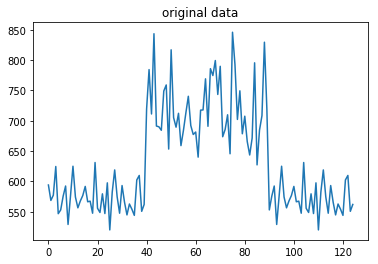

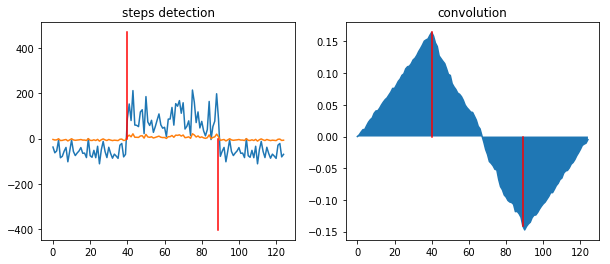

{'up': 40, 'down': 89}

In [196]:
## data: signal to be analyzed
d = '''594.          568.55555556  577.22222222  624.55555556  546.66666667
552.88888889  575.55555556  592.33333333  528.88888889  576.11111111
625.          574.22222222  556.33333333  567.66666667  576.66666667
591.66666667  566.33333333  567.33333333  547.44444444  631.11111111
555.66666667  548.66666667  579.44444444  546.88888889  597.55555556
519.88888889  582.33333333  618.88888889  574.55555556  547.44444444
593.11111111  565.66666667  544.66666667  562.66666667  554.11111111
543.88888889  602.33333333  609.77777778  550.55555556  561.88888889
719.33333333  784.44444444  711.22222222  843.66666667  691.33333333
690.11111111  684.33333333  749.11111111  759.11111111  653.33333333
817.11111111  705.22222222  689.44444444  712.33333333  659.
683.88888889  713.          740.44444444  692.22222222  677.33333333
681.44444444  640.          717.55555556  717.88888889  769.22222222
690.88888889  786.          774.66666667  799.44444444  743.44444444
789.88888889  673.66666667  685.66666667  709.88888889  645.55555556
846.11111111  792.77777778  702.22222222  749.44444444  678.55555556
707.55555556  665.77777778  643.55555556  671.44444444  795.66666667
627.22222222  684.55555556  708.44444444  829.66666667  719.        
552.88888889  575.55555556  592.33333333  528.88888889  576.11111111
625.          574.22222222  556.33333333  567.66666667  576.66666667
591.66666667  566.33333333  567.33333333  547.44444444  631.11111111
555.66666667  548.66666667  579.44444444  546.88888889  597.55555556
519.88888889  582.33333333  618.88888889  574.55555556  547.44444444
593.11111111  565.66666667  544.66666667  562.66666667  554.11111111
543.88888889  602.33333333  609.77777778  550.55555556  561.88888889
'''
data = np.array([*map(float, d.split())])
# display
import matplotlib.pyplot as plt
plt.plot(data)
plt.title('original data')
plt.show()
# steps detection
step_detector(data, verbose = True)

### Example 2: [step DOWN + step UP]

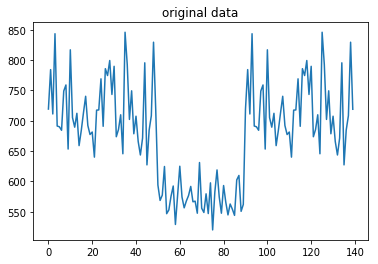

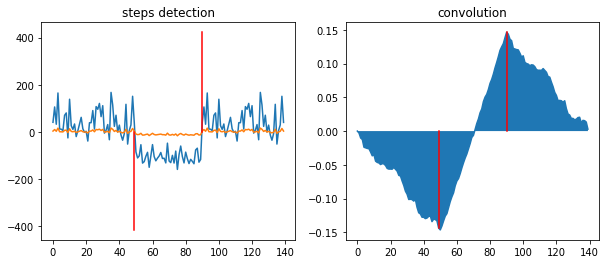

{'up': 90, 'down': 49}

In [198]:
## data: signal to be analyzed
d = '''719.33333333  784.44444444  711.22222222  843.66666667  691.33333333
690.11111111  684.33333333  749.11111111  759.11111111  653.33333333
817.11111111  705.22222222  689.44444444  712.33333333  659.
683.88888889  713.          740.44444444  692.22222222  677.33333333
681.44444444  640.          717.55555556  717.88888889  769.22222222
690.88888889  786.          774.66666667  799.44444444  743.44444444
789.88888889  673.66666667  685.66666667  709.88888889  645.55555556
846.11111111  792.77777778  702.22222222  749.44444444  678.55555556
707.55555556  665.77777778  643.55555556  671.44444444  795.66666667
627.22222222  684.55555556  708.44444444  829.66666667  719.        
594.          568.55555556  577.22222222  624.55555556  546.66666667
552.88888889  575.55555556  592.33333333  528.88888889  576.11111111
625.          574.22222222  556.33333333  567.66666667  576.66666667
591.66666667  566.33333333  567.33333333  547.44444444  631.11111111
555.66666667  548.66666667  579.44444444  546.88888889  597.55555556
519.88888889  582.33333333  618.88888889  574.55555556  547.44444444
593.11111111  565.66666667  544.66666667  562.66666667  554.11111111
543.88888889  602.33333333  609.77777778  550.55555556  561.88888889
719.33333333  784.44444444  711.22222222  843.66666667  691.33333333
690.11111111  684.33333333  749.11111111  759.11111111  653.33333333
817.11111111  705.22222222  689.44444444  712.33333333  659.
683.88888889  713.          740.44444444  692.22222222  677.33333333
681.44444444  640.          717.55555556  717.88888889  769.22222222
690.88888889  786.          774.66666667  799.44444444  743.44444444
789.88888889  673.66666667  685.66666667  709.88888889  645.55555556
846.11111111  792.77777778  702.22222222  749.44444444  678.55555556
707.55555556  665.77777778  643.55555556  671.44444444  795.66666667
627.22222222  684.55555556  708.44444444  829.66666667  719.        '''
data = np.array([*map(float, d.split())])
# display
import matplotlib.pyplot as plt
plt.plot(data)
plt.title('original data')
plt.show()
# steps detection
step_detector(data, verbose = True)

### Example 3: [step DOWN]

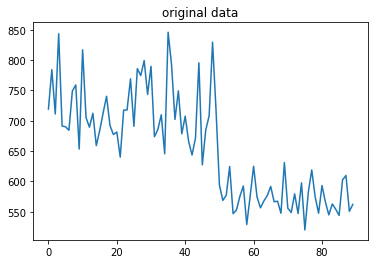

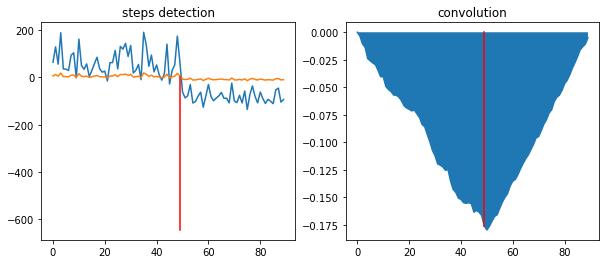

{'up': 0, 'down': 49}

In [199]:
## data: signal to be analyzed
d = '''719.33333333  784.44444444  711.22222222  843.66666667  691.33333333
690.11111111  684.33333333  749.11111111  759.11111111  653.33333333
817.11111111  705.22222222  689.44444444  712.33333333  659.
683.88888889  713.          740.44444444  692.22222222  677.33333333
681.44444444  640.          717.55555556  717.88888889  769.22222222
690.88888889  786.          774.66666667  799.44444444  743.44444444
789.88888889  673.66666667  685.66666667  709.88888889  645.55555556
846.11111111  792.77777778  702.22222222  749.44444444  678.55555556
707.55555556  665.77777778  643.55555556  671.44444444  795.66666667
627.22222222  684.55555556  708.44444444  829.66666667  719.        
594.          568.55555556  577.22222222  624.55555556  546.66666667
552.88888889  575.55555556  592.33333333  528.88888889  576.11111111
625.          574.22222222  556.33333333  567.66666667  576.66666667
591.66666667  566.33333333  567.33333333  547.44444444  631.11111111
555.66666667  548.66666667  579.44444444  546.88888889  597.55555556
519.88888889  582.33333333  618.88888889  574.55555556  547.44444444
593.11111111  565.66666667  544.66666667  562.66666667  554.11111111
543.88888889  602.33333333  609.77777778  550.55555556  561.88888889'''
data = np.array([*map(float, d.split())])
# display
import matplotlib.pyplot as plt
plt.plot(data)
plt.title('original data')
plt.show()
# steps detection
step_detector(data, verbose = True)

### Example 4: [step UP]

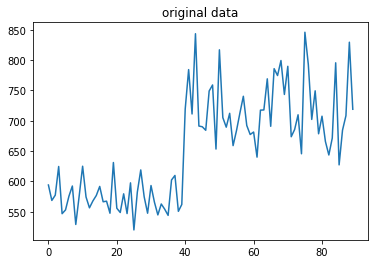

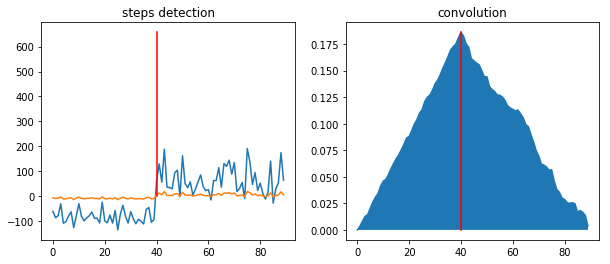

{'up': 40, 'down': None}

In [200]:
## data: signal to be analyzed
d = '''594.          568.55555556  577.22222222  624.55555556  546.66666667
552.88888889  575.55555556  592.33333333  528.88888889  576.11111111
625.          574.22222222  556.33333333  567.66666667  576.66666667
591.66666667  566.33333333  567.33333333  547.44444444  631.11111111
555.66666667  548.66666667  579.44444444  546.88888889  597.55555556
519.88888889  582.33333333  618.88888889  574.55555556  547.44444444
593.11111111  565.66666667  544.66666667  562.66666667  554.11111111
543.88888889  602.33333333  609.77777778  550.55555556  561.88888889
719.33333333  784.44444444  711.22222222  843.66666667  691.33333333
690.11111111  684.33333333  749.11111111  759.11111111  653.33333333
817.11111111  705.22222222  689.44444444  712.33333333  659.
683.88888889  713.          740.44444444  692.22222222  677.33333333
681.44444444  640.          717.55555556  717.88888889  769.22222222
690.88888889  786.          774.66666667  799.44444444  743.44444444
789.88888889  673.66666667  685.66666667  709.88888889  645.55555556
846.11111111  792.77777778  702.22222222  749.44444444  678.55555556
707.55555556  665.77777778  643.55555556  671.44444444  795.66666667
627.22222222  684.55555556  708.44444444  829.66666667  719.        
'''
data = np.array([*map(float, d.split())])
# display
import matplotlib.pyplot as plt
plt.plot(data)
plt.title('original data')
plt.show()
# steps detection
step_detector(data, verbose = True)